In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reduced dataset

In [2]:
df = pd.read_pickle('Chess-unprocessed/Chess_games.pkl')
df.head()

turns increment_code  white_rating  black_rating  \
0     13           15+2          1500          1191   
1     16           5+10          1322          1261   
2     61           5+10          1496          1500   
3     61           20+0          1439          1454   
4     95           30+3          1523          1469   

                                               moves  opening  victory_status  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...      248               2   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...       71               3   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...      171               1   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...      241               1   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...      192               1   

   winner  
0       2  
1       0  
2       2  
3       2  
4       2

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   turns           20058 non-null  int64 
 1   increment_code  20058 non-null  object
 2   white_rating    20058 non-null  int64 
 3   black_rating    20058 non-null  int64 
 4   moves           20058 non-null  object
 5   opening         20058 non-null  int64 
 6   victory_status  20058 non-null  int64 
 7   winner          20058 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.2+ MB


In [4]:
df.describe()

turns  white_rating  black_rating       opening  victory_status  \
count  20058.000000  20058.000000  20058.000000  20058.000000    20058.000000   
mean      60.465999   1596.631868   1588.831987    140.244890        2.150065   
std       33.570585    291.253376    291.036126     85.356819        1.014535   
min        1.000000    784.000000    789.000000      0.000000        0.000000   
25%       37.000000   1398.000000   1391.000000     72.000000        1.000000   
50%       55.000000   1567.000000   1562.000000    152.000000        3.000000   
75%       79.000000   1793.000000   1784.000000    201.000000        3.000000   
max      349.000000   2700.000000   2723.000000    364.000000        3.000000   

             winner  
count  20058.000000  
mean       1.044571  
std        0.975038  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        2.000000  
max        2.000000

In [5]:
df.isna().sum()

turns             0
increment_code    0
white_rating      0
black_rating      0
moves             0
opening           0
victory_status    0
winner            0
dtype: int64

In [6]:
df.drop(['moves'], axis=1, inplace=True)

In [7]:
def changeTime(df):
    for i in range(df.shape[0]):
        df['increment_code'][i] = int(df['increment_code'][i].split("+")[0]) + int(df['increment_code'][i].split("+")[1])
    return df

In [8]:
df = changeTime(df.copy())

<ipython-input-7-1d8377cdf1ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['increment_code'][i] = int(df['increment_code'][i].split("+")[0]) + int(df['increment_code'][i].split("+")[1])


In [9]:
df['increment_code'] = df['increment_code'].astype('int64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   turns           20058 non-null  int64
 1   increment_code  20058 non-null  int64
 2   white_rating    20058 non-null  int64
 3   black_rating    20058 non-null  int64
 4   opening         20058 non-null  int64
 5   victory_status  20058 non-null  int64
 6   winner          20058 non-null  int64
dtypes: int64(7)
memory usage: 1.1 MB


<AxesSubplot:>

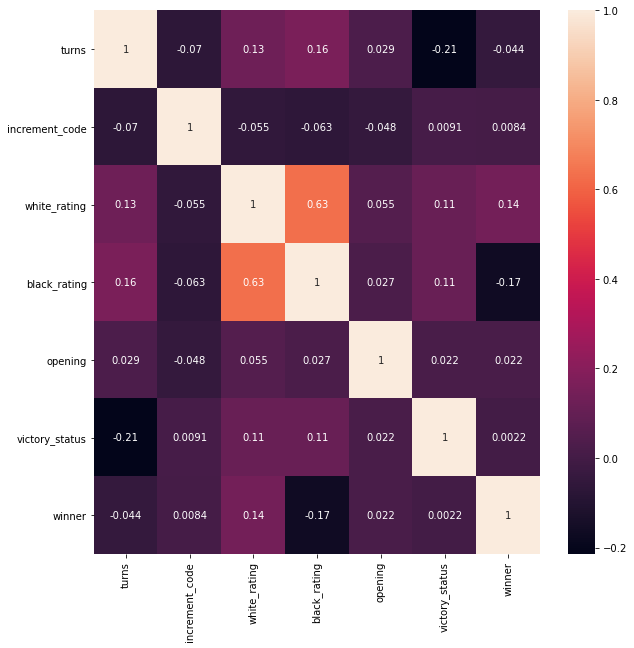

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

## Full dataset

In [12]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [13]:
data = pd.read_pickle('Cleaned dataset/chess.pkl')
data.head()

turns increment_code  white_rating  black_rating  opening  a1  a2  a3  a4  \
0     13           15+2          1500          1191      248   0   0   0   0   
1     16           5+10          1322          1261       71   0   0   0   0   
2     61           5+10          1496          1500      171   0   0   1   2   
3     61           20+0          1439          1454      241   0   0   0   0   
4     95           30+3          1523          1469      192   0   0   1   1   

   a5  ...  rxh1  rxh2  rxh3  rxh4  rxh5  rxh6  rxh7  rxh8  victory_status  \
0   0  ...     0     0     0     0     0     0     0     0               2   
1   0  ...     0     0     0     0     0     0     0     0               3   
2   1  ...     0     0     0     0     0     0     1     1               1   
3   0  ...     0     0     0     0     0     0     0     0               1   
4   0  ...     0     0     0     1     0     0     0     0               1   

   winner  
0       2  
1       0  
2       2  
3       2  
4       2  

[5 rows x 2695 columns]

In [14]:
data = changeTime(data.copy())

<ipython-input-7-1d8377cdf1ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['increment_code'][i] = int(df['increment_code'][i].split("+")[0]) + int(df['increment_code'][i].split("+")[1])


In [15]:
data.head()

turns increment_code  white_rating  black_rating  opening  a1  a2  a3  a4  \
0     13             17          1500          1191      248   0   0   0   0   
1     16             15          1322          1261       71   0   0   0   0   
2     61             15          1496          1500      171   0   0   1   2   
3     61             20          1439          1454      241   0   0   0   0   
4     95             33          1523          1469      192   0   0   1   1   

   a5  ...  rxh1  rxh2  rxh3  rxh4  rxh5  rxh6  rxh7  rxh8  victory_status  \
0   0  ...     0     0     0     0     0     0     0     0               2   
1   0  ...     0     0     0     0     0     0     0     0               3   
2   1  ...     0     0     0     0     0     0     1     1               1   
3   0  ...     0     0     0     0     0     0     0     0               1   
4   0  ...     0     0     0     1     0     0     0     0               1   

   winner  
0       2  
1       0  
2       2  
3       2  
4       2  

[5 rows x 2695 columns]

In [16]:
data['increment_code'] = data['increment_code'].astype('int64')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Columns: 2695 entries, turns to winner
dtypes: int64(2695)
memory usage: 412.4 MB


In [18]:
add = tree.DecisionTreeClassifier()

In [19]:
features = data.iloc[:,:-1]
labels = data.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(features,labels, test_size=0.2,random_state=0)

In [20]:
add.fit(X_train,Y_train)

DecisionTreeClassifier()

In [21]:
Y_pred = add.predict(X_test)

In [22]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1849
           1       0.97      0.97      0.97       175
           2       0.67      0.67      0.67      1988

    accuracy                           0.67      4012
   macro avg       0.76      0.76      0.76      4012
weighted avg       0.67      0.67      0.67      4012



In [23]:
print("Matrice de confusion : \n",confusion_matrix(Y_test, Y_pred))
print("Accuracy : \n",accuracy_score(Y_test,Y_pred))

Matrice de confusion : 
 [[1184    1  664]
 [   3  170    2]
 [ 658    4 1326]]
Accuracy : 
 0.6679960119641076


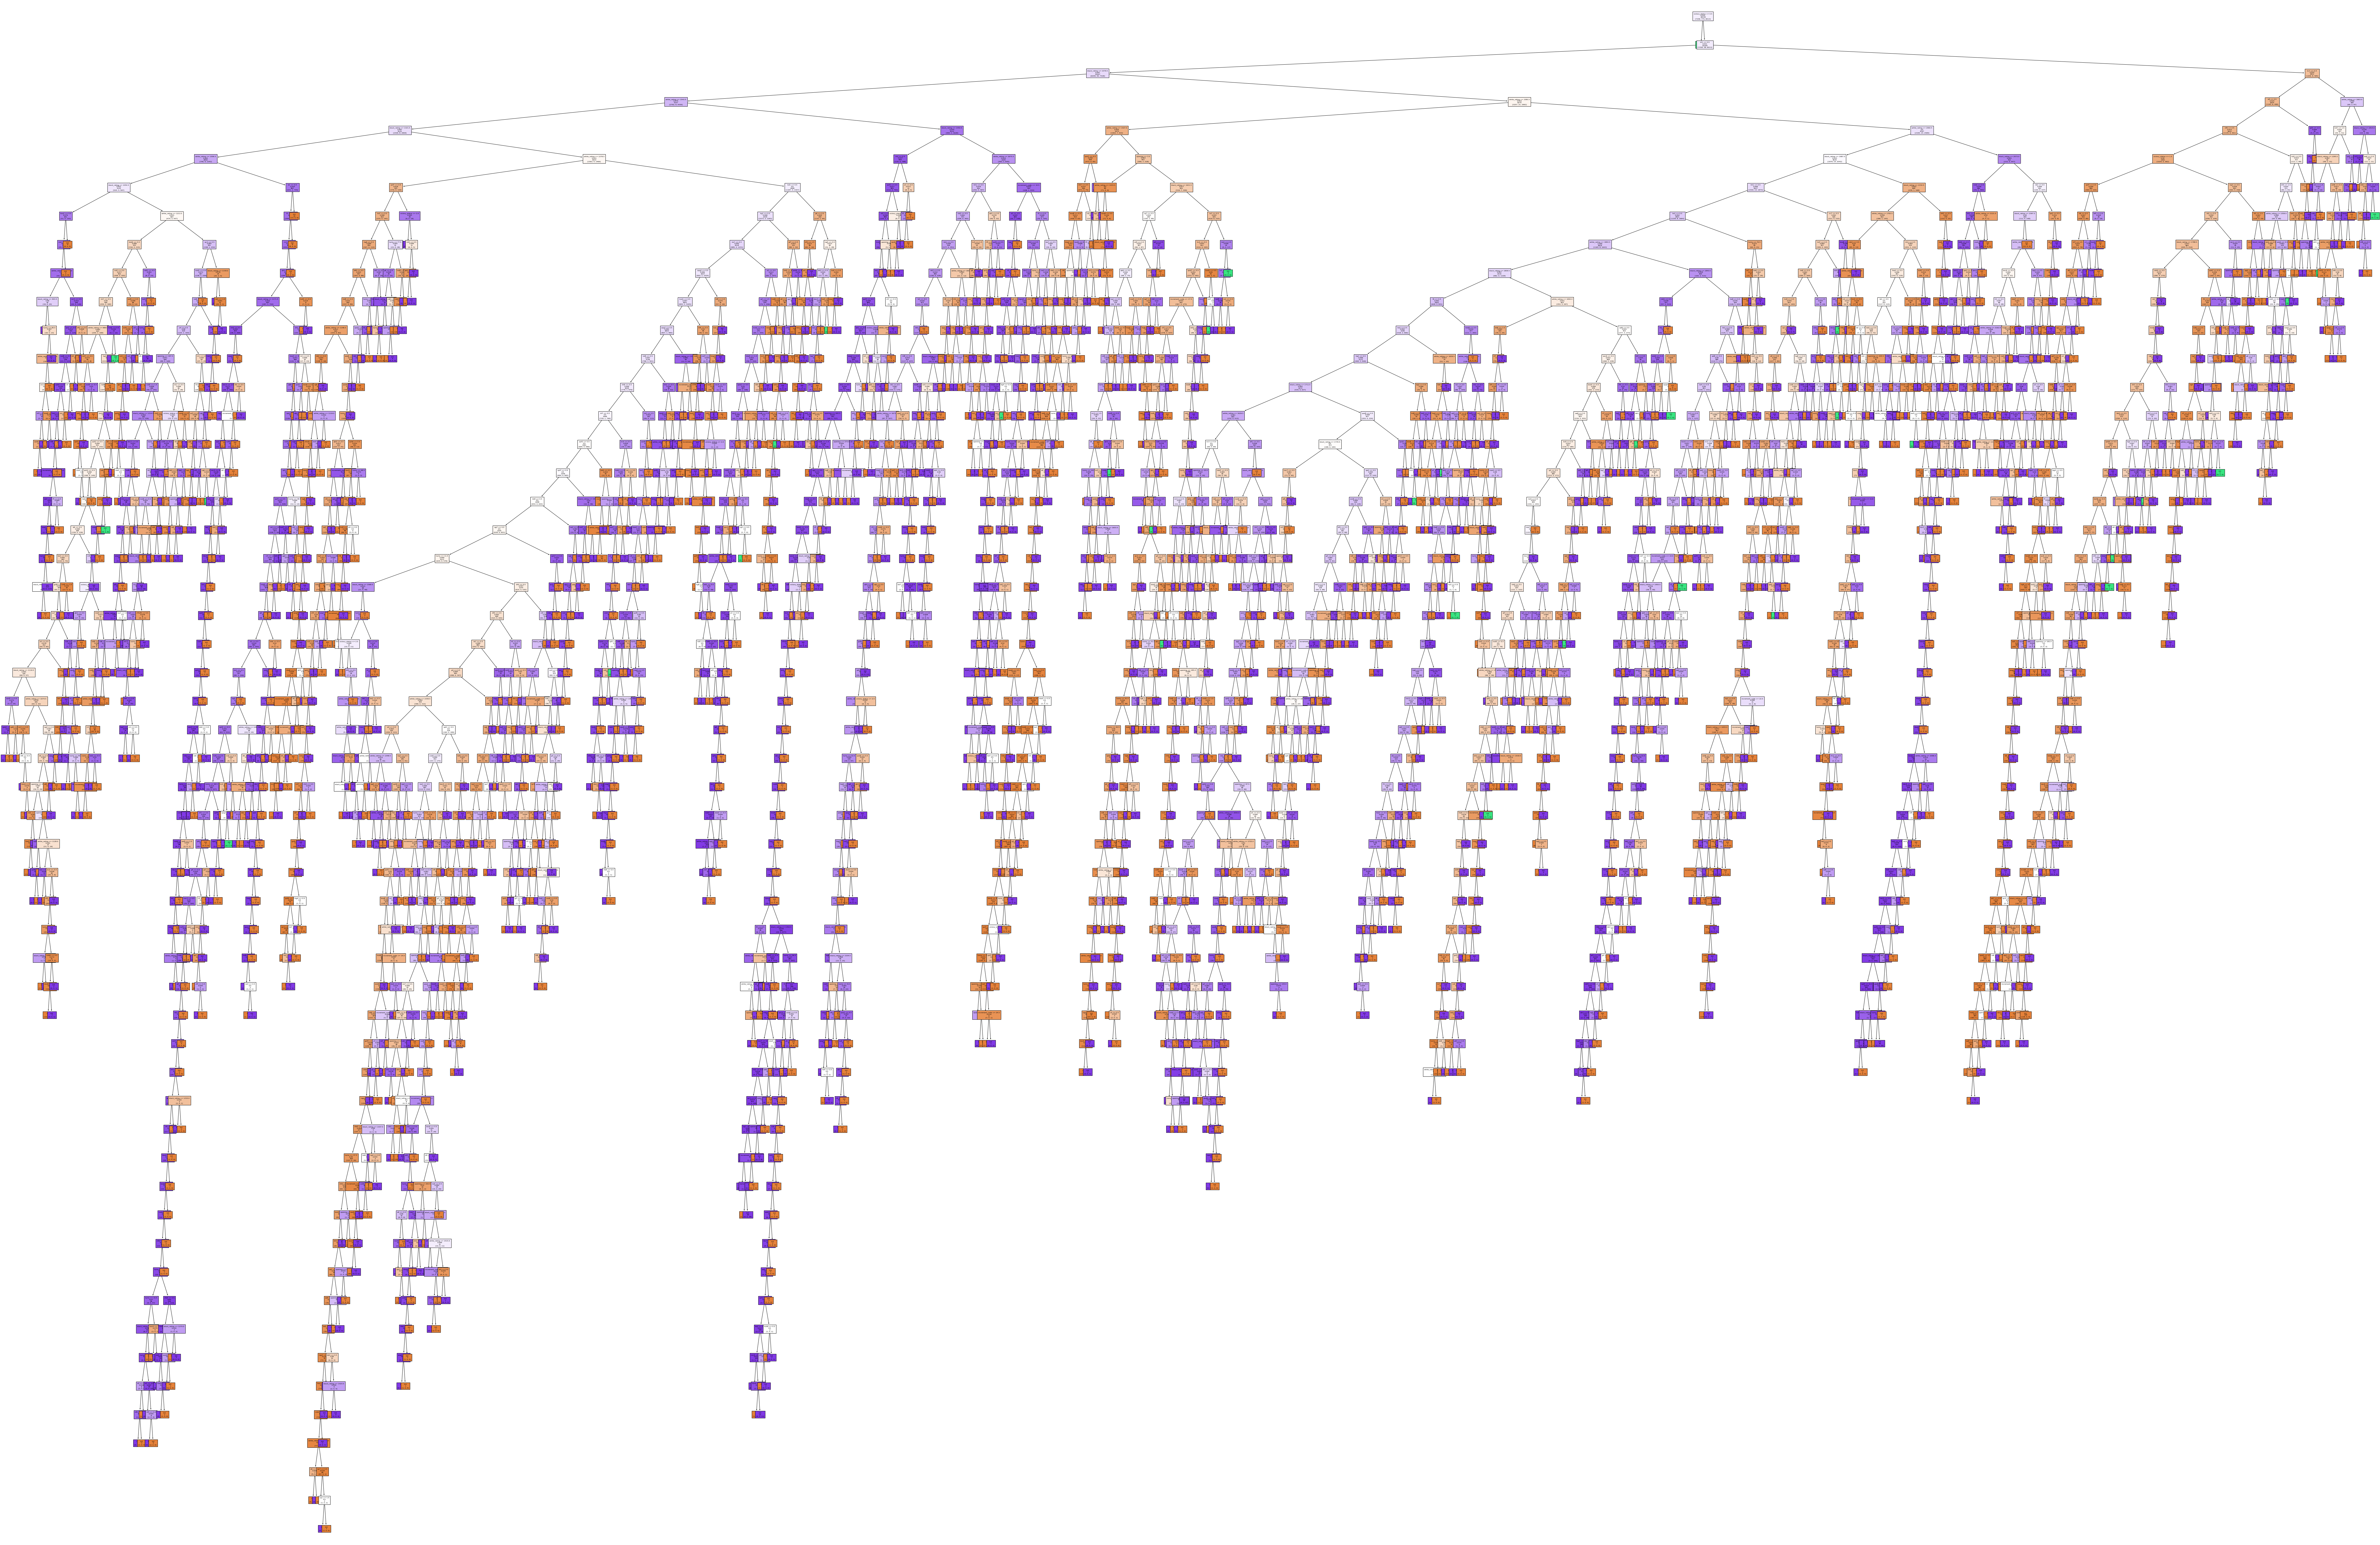

In [27]:
plt.figure(figsize=(150,100))
tree.plot_tree(add, feature_names=features.columns.tolist(), label=labels.name, fontsize=6,filled=True)
plt.savefig("Decision_tree", dpi=100)